In [1]:
import csv
import pandas
# load dataset
dst = pandas.read_csv('Physcidataset.tsv', delimiter = '\t', lineterminator='\n')
dst.head()

,id,name,year,title,content,abstract,author
0,1,Paper1,1948,theory of Gravitation,"REVI EWS OF MOD ERN PHYSICS VOLUME 20, NUM HE...",NaN,\r
1,2,Paper2_1,2018,PRINCIPAL COMPONENT ANALYSIS AS A TOOL FOR CHA...,1. INTRODUCTION The task of imaging and model...,ABSTRACT\r We explore the use of principal com...,\r
2,3,Paper2_2,2018,PRINCIPAL COMPONENT ANALYSIS AS A TOOL FOR CHA...,"We, therefore, expect, following the discussio...",NaN,\r
3,4,Paper3,1935,The Particle Problem in the General Theory of ...,JULY 1935 PHYSICAL REVIEW VOLUME 48 The Pa...,NaN,\r
4,5,Paper4,1939,On Continued Gravitational Contraction\r,PHYSICAL REVIEW VOLUME 56 Contraction SNYDER...,NaN,J. R. OPPENHEIMER AND H. SNYDER\r


In [3]:
#compute word count for each paper
dst['total_word'] = dst['content'].apply(lambda x: len(str(x).split(" ")))
dst[['content','total_word']].head()

,content,total_word
0,"REVI EWS OF MOD ERN PHYSICS VOLUME 20, NUM HE...",2173
1,1. INTRODUCTION The task of imaging and model...,7507
2,"We, therefore, expect, following the discussio...",1329
3,JULY 1935 PHYSICAL REVIEW VOLUME 48 The Pa...,3438
4,PHYSICAL REVIEW VOLUME 56 Contraction SNYDER...,2321


In [4]:
#analysis of word counts
dst.total_word.describe()

count      32.000000
mean     3968.468750
std      1847.415055
min         1.000000
25%      2649.000000
50%      3528.000000
75%      5514.750000
max      7864.000000
Name: total_word, dtype: float64

In [7]:
#determine most common words
freq_most_common_word = pandas.Series(' '.join(dst['content'].astype(str)).split()).value_counts()[:25]
freq_most_common_word

the      10127
of        5571
to        2569
a         2457
in        2448
is        2271
and       2240
that      1492
for       1198
by        1034
with      1027
be        1012
The        980
are        892
as         837
we         792
this       715
which      707
from       697
on         656
black      642
an         467
In         454
can        439
at         438
dtype: int64

In [9]:
#determine least common words
freq_least_common_word =  pandas.Series(' '.join(dst['content'].astype(str)).split()).value_counts()[-25:]
freq_least_common_word

Veleta              1
distinguished       1
2018a)              1
0;                  1
r2.                 1
z*                  1
while,              1
corrected           1
Aα.                 1
(non-affine)        1
(spin               1
separable.          1
unstationary        1
values)             1
phenomenologies,    1
instructive.        1
cancelled           1
3.5PN,              1
(1963)              1
yields:             1
perceived           1
protects            1
identically,        1
D)                  1
dL+                 1
dtype: int64

In [10]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download()
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayseg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayseg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#text pre-processing
#call stopwords
stop_words = set(stopwords.words("english"))
#define new stopwords
new_words = ["shown","ab", "ppt", "eq", "set", "given","cc","cr", "ix" "fully", "using", "et", "al", "show", "result", "large", "also", "iv", "one", "two","bif", "new", "image","figure", "previously"]
stop_words = stop_words.union(new_words)

In [14]:
corpus = []
for i in range(0, 3847):
    #for eliminating punctuations
    #text = re.sub('[^a-zA-Z]', ' ', dst['content'][i])
   
    #make lowercase
    #text = text.lower()
    
    #tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    #special characters
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #change string to list
    text = text.split()
    
    #Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [15]:
#created corpus
corpus[500]

'published sissa springer received november accepted december published december black hole entropy soft hair abstract infinitesimal virasoro l virasoro r diffeomorphisms presented act non trivially horizon generic kerr black hole spin j covariant phase space formalism provides formula virasoro charge surface integral horizon integrability associativity charge algebra require inclusion wald zoupas counterterms counterterm satisfying known consistency requirement constructed yield central charge cl j assuming existence quantum hilbert space charge generate symmetry well applicability cardy formula central charge reproduce macroscopic area entropy law generic kerr black hole keywords black hole gauge gravity correspondence space time symmetry arxiv eprint deeply saddened lose much loved friend collaborator stephen hawking whose contribution black hole physic remained vitally stimulating end paper summarizes status long term project diffeomorphisms soft hair quantum structure black hole e

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import re
countvec=CountVectorizer(max_df=1.0,stop_words=stop_words, max_features=None, ngram_range=(1,3))
X=countvec.fit_transform(corpus)

In [42]:
list(countvec.vocabulary_.keys())[:25]

['published',
 'sissa',
 'springer',
 'received',
 'november',
 'accepted',
 'december',
 'black',
 'hole',
 'entropy',
 'soft',
 'hair',
 'abstract',
 'infinitesimal',
 'virasoro',
 'diffeomorphisms',
 'presented',
 'act',
 'non',
 'trivially',
 'horizon',
 'generic',
 'kerr',
 'spin',
 'covariant']

[Text(0,0,'hole'),
 Text(0,0,'black'),
 Text(0,0,'horizon'),
 Text(0,0,'charge'),
 Text(0,0,'space'),
 Text(0,0,'boundary'),
 Text(0,0,'symmetry'),
 Text(0,0,'form'),
 Text(0,0,'hilbert'),
 Text(0,0,'conformal'),
 Text(0,0,'virasoro'),
 Text(0,0,'phase'),
 Text(0,0,'region'),
 Text(0,0,'act'),
 Text(0,0,'surface'),
 Text(0,0,'term'),
 Text(0,0,'diffeos'),
 Text(0,0,'kerr'),
 Text(0,0,'case'),
 Text(0,0,'vir')]

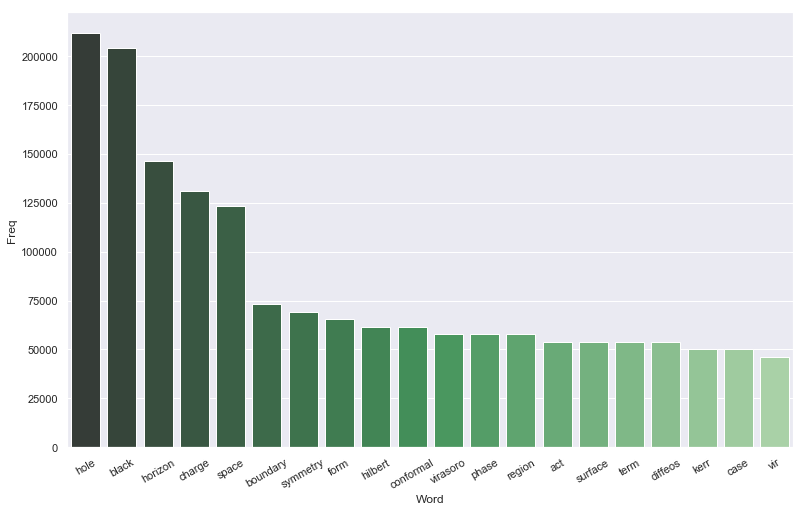

In [43]:
#Calculate most common words-most frequently occuring.
def get_freq_n_words(corpus, n=None):
    count_vec = CountVectorizer().fit(corpus)
    bagofwords = count_vec.transform(corpus)
    total_words = bagofwords.sum(axis=0) 
    freq = [(word, total_words[0, idx]) for word, idx in      
                   count_vec.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], 
                       reverse=True)
    return freq[:n]
#dataframe of most frequently occuring words 
freq_words = get_freq_n_words(corpus, n=20)
freq_dst = pandas.DataFrame(freq_words)
freq_dst.columns=["Word", "Freq"]
#barplot
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=freq_dst, palette="Greens_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram    Freq
0             black hole  203891
1            phase space   57705
2          hilbert space   57705
3          non trivially   26929
4       hidden conformal   26929
5     conformal symmetry   26929
6           central term   26929
7                act non   23082
8             kerr black   23082
9            wald zoupas   23082
10               vir vir   23082
11          past horizon   23082
12  conformal coordinate   19235
13      covariant charge   19235
14          near horizon   19235


[Text(0,0,'black hole'),
 Text(0,0,'phase space'),
 Text(0,0,'hilbert space'),
 Text(0,0,'non trivially'),
 Text(0,0,'hidden conformal'),
 Text(0,0,'conformal symmetry'),
 Text(0,0,'central term'),
 Text(0,0,'act non'),
 Text(0,0,'kerr black'),
 Text(0,0,'wald zoupas'),
 Text(0,0,'vir vir'),
 Text(0,0,'past horizon'),
 Text(0,0,'conformal coordinate'),
 Text(0,0,'covariant charge'),
 Text(0,0,'near horizon')]

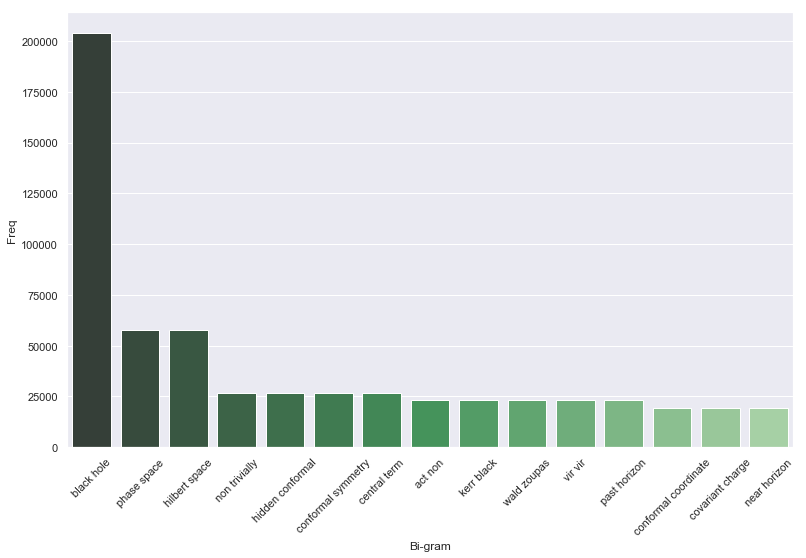

In [44]:
#Start Bi-grams for common words
def get_freq_bi_words(corpus, n=None):
    count_vec2 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bagofwords = count_vec2.transform(corpus)
    total_words = bagofwords.sum(axis=0) 
    freq = [(word, total_words[0, idx]) for word, idx in     
                  count_vec2.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], 
                reverse=True)
    return freq[:n]
freq_words2 = get_freq_bi_words(corpus, n=15)
freq_dst2 = pandas.DataFrame(freq_words2)
freq_dst2.columns=["Bi-gram", "Freq"]
print(freq_dst2)
#Barplot with Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=freq_dst2, palette="Greens_d")
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                         Tri-gram   Freq
0       hidden conformal symmetry  26929
1               act non trivially  23082
2                 kerr black hole  23082
3           covariant phase space  11541
4   construction covariant charge  11541
5                  vir vir action  11541
6               outer boundary ad  11541
7              boundary ad region  11541
8              generic black hole  11541
9              black hole hilbert  11541
10             hole hilbert space  11541
11             black hole horizon  11541
12              via dirac bracket  11541
13          black hole microstate  11541
14         black hole microstates  11541
15             black hole entropy   7694
16          non trivially horizon   7694
17             generic kerr black   7694
18          phase space formalism   7694
19       charge generate symmetry   7694


[Text(0,0,'hidden conformal symmetry'),
 Text(0,0,'act non trivially'),
 Text(0,0,'kerr black hole'),
 Text(0,0,'covariant phase space'),
 Text(0,0,'construction covariant charge'),
 Text(0,0,'vir vir action'),
 Text(0,0,'outer boundary ad'),
 Text(0,0,'boundary ad region'),
 Text(0,0,'generic black hole'),
 Text(0,0,'black hole hilbert'),
 Text(0,0,'hole hilbert space'),
 Text(0,0,'black hole horizon'),
 Text(0,0,'via dirac bracket'),
 Text(0,0,'black hole microstate'),
 Text(0,0,'black hole microstates'),
 Text(0,0,'black hole entropy'),
 Text(0,0,'non trivially horizon'),
 Text(0,0,'generic kerr black'),
 Text(0,0,'phase space formalism'),
 Text(0,0,'charge generate symmetry')]

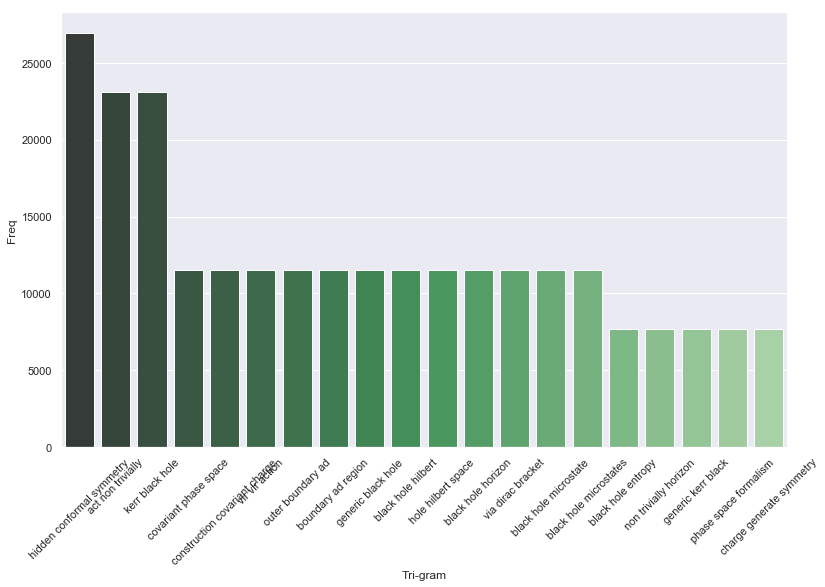

In [45]:
#Tri-grams of words
def get_freq_tri_words(corpus, n=None):
    count_vec3 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bagofwords = count_vec3.transform(corpus)
    total_words = bagofwords.sum(axis=0) 
    freq = [(word, total_words[0, idx]) for word, idx in     
                  count_vec3.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], 
                reverse=True)
    return freq[:n]
freq_words3 = get_freq_tri_words(corpus, n=20)
freq_dst3 = pandas.DataFrame(freq_words3)
freq_dst3.columns=["Tri-gram", "Freq"]
print(freq_dst3)
#Barplot with Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=freq_dst3,  palette="Greens_d")
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_tf=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_tf.fit(X)
names=countvec.get_feature_names()
document=corpus[2000]
tfvector=tfidf_tf.transform(countvec.transform([document]))

In [58]:
#tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 #compute tfidf scores
def get_top_n_vector(names, listed_words, topn=50):
    listed_words = listed_words[:topn]
    tfidf_score_values = []
    names_values = []
    
    for idx, score in listed_words: 
        tfidf_score_values.append(round(score, 3))
        names_values.append(feature_names[idx])
    #tuples of score, feature
    results= {}
    for idx in range(len(names_values)):
        results[names_values[idx]]=tfidf_score_values[idx]
    return results
#list the tf-idf vectors 
listed_words=sort_coo(tf_idf_vector.tocoo())
#extract top n n=50
keywords=get_top_n_vector(names,listed_words,200)

print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
published sissa springer received november accepted december published december black hole entropy soft hair abstract infinitesimal virasoro l virasoro r diffeomorphisms presented act non trivially horizon generic kerr black hole spin j covariant phase space formalism provides formula virasoro charge surface integral horizon integrability associativity charge algebra require inclusion wald zoupas counterterms counterterm satisfying known consistency requirement constructed yield central charge cl j assuming existence quantum hilbert space charge generate symmetry well applicability cardy formula central charge reproduce macroscopic area entropy law generic kerr black hole keywords black hole gauge gravity correspondence space time symmetry arxiv eprint deeply saddened lose much loved friend collaborator stephen hawking whose contribution black hole physic remained vitally stimulating end paper summarizes status long term project diffeomorphisms soft hair quantum structure bl

In [59]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [63]:
set_of_stopwords = set(stopwords.words('english'))

In [64]:
vectorizer = TfidfVectorizer(stop_words=set_of_stopwords,
                                 use_idf=True, ngram_range=(1, 3))
X = vectorizer.fit_transform(corpus)

In [65]:
X[0]

<1x4741 sparse matrix of type '<class 'numpy.float64'>'
	with 4741 stored elements in Compressed Sparse Row format>

In [66]:
print (X[0])

  (0, 3361)	0.011991105897912338
  (0, 3835)	0.005995552948956169
  (0, 4004)	0.005995552948956169
  (0, 3478)	0.005995552948956169
  (0, 2992)	0.005995552948956169
  (0, 15)	0.005995552948956169
  (0, 1035)	0.011991105897912338
  (0, 404)	0.317764306294677
  (0, 2034)	0.3297554121925893
  (0, 1362)	0.06595108243851787
  (0, 3864)	0.047964423591649354
  (0, 1935)	0.023982211795824677
  (0, 12)	0.005995552948956169
  (0, 2317)	0.011991105897912338
  (0, 4565)	0.08993329423434254
  (0, 1146)	0.01798665884686851
  (0, 3280)	0.011991105897912338
  (0, 30)	0.08393774128538638
  (0, 2927)	0.06595108243851787
  (0, 4400)	0.04196887064269319
  (0, 2143)	0.22783101206033443
  (0, 1852)	0.053959976540605525
  (0, 2460)	0.0779421883364302
  (0, 3989)	0.01798665884686851
  (0, 1001)	0.06595108243851787
  :	:
  (0, 2409)	0.005995552948956169
  (0, 1180)	0.005995552948956169
  (0, 628)	0.005995552948956169
  (0, 853)	0.005995552948956169
  (0, 823)	0.005995552948956169
  (0, 1789)	0.0059955529489561

In [67]:
X.shape

(3847, 4741)

In [71]:
lsa = TruncatedSVD(n_components=21, n_iter=10)
lsa.fit(X)  

TruncatedSVD(algorithm='randomized', n_components=21, n_iter=10,
       random_state=None, tol=0.0)

In [69]:
import sys
print (sys.version)

3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [73]:
keywords = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_): 
    computedwords = zip (keywords,comp)
    sorteditems =  sorted(computedwords, key=lambda x: x[1], reverse=True) [:50]
    print ("Concept %d:" % i)
    for term in sorteditems:
        print (term[0])
    print (" ")

Concept 0:
hole
black
black hole
horizon
charge
space
boundary
symmetry
form
conformal
hilbert
hilbert space
phase
phase space
region
virasoro
act
diffeos
surface
term
case
kerr
vir
covariant
entropy
non
section
spacetime
central
future
mode
state
well
action
formula
full
generic
left
linearized
near
obstruction
ad
analysis
condition
coordinate
defined
gauge
hidden
quantum
soft
 
Concept 1:
horizon
boundary
black
black hole
charge
vir
symmetry
form
act non
act non trivially
along
area
argument
cl
counterterm
div
fixed
general
generate
however
kerr black
kerr black hole
law
moreover
past horizon
representation
temperature
vir vir
wald zoupas
zoupas
abelian group
action
formula
full
generic
left
linearized
near
obstruction
absorption cross
covariant
entropy
non
section
spacetime
integrable
absent extra symmetry
actually
affine
algebra
 
Concept 2:
abelian
abelian group clearly
horizon
absence
access article distributed
boundary
charge
vir
form
absence obstruction necessary
symmetry
act n